In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount ('/content/drive')

disney_plus_path = 'disney_plus_titles.csv'
disney_plus_df = pd.read_csv(disney_plus_path)

imdb_path = 'imdb_top_1000.csv'
imdb_top_df = pd.read_csv(imdb_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("DisneyPlus Column Names:")
print(disney_plus_df.columns.tolist())

DisneyPlus Column Names:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
print("IMDB Column Names:")

IMDB Column Names:
['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']


In [ ]:
#merged_df = pd.concat([disney_plus_df, imdb_top_df])
#merged_df.to_csv('merged_data.csv', index=False)

merged_df = pd.merge(disney_plus_df, imdb_top_df, left_on='title', right_on='Series_Title', how='inner')
merged_df.to_csv(r'raw_combined_disney_imdb.csv')

Adventure    31
Animation    27
Comedy       22
Family       13
Drama        11
Biography     7
Fantasy       7
Action        6
History       2
Romance       1
Sci-Fi        1
Sport         1
Name: Genre, dtype: int64


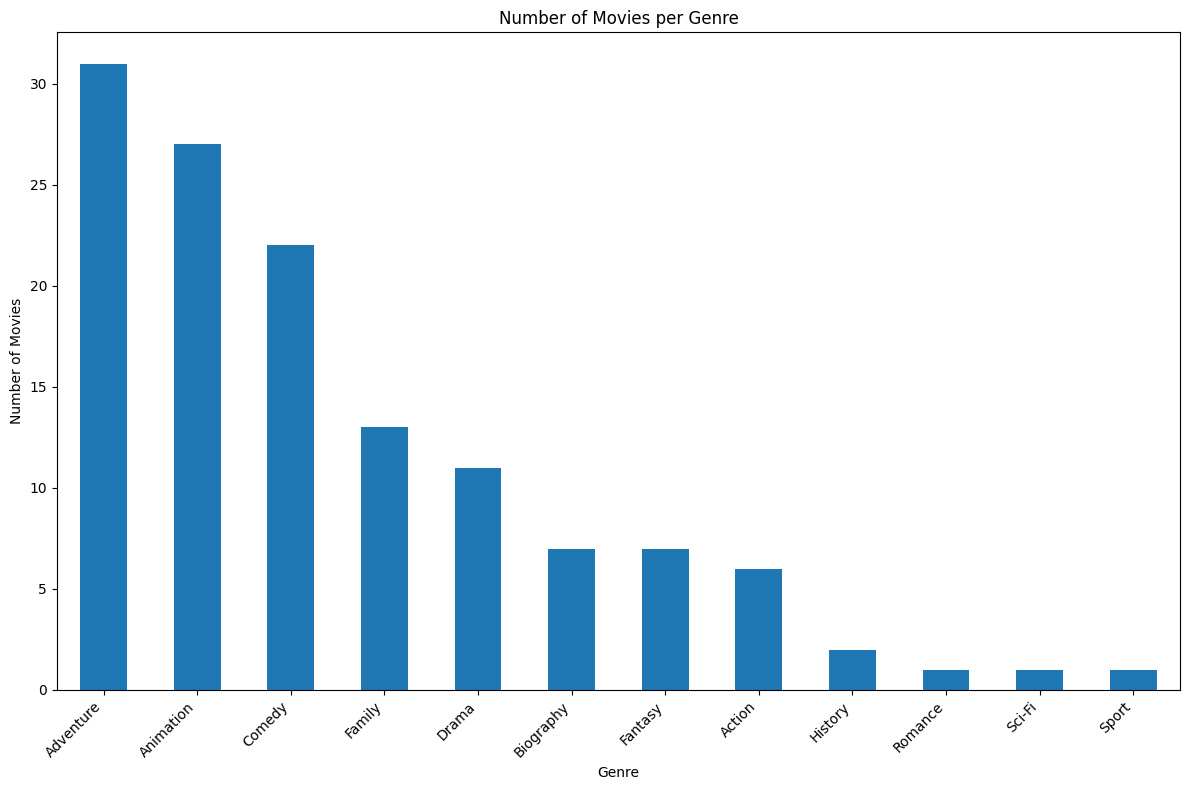

In [ ]:
genre_counts = merged_df['Genre'].str.split(', ').explode().value_counts()
print(genre_counts)

# Plotting the counts as above
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

In [ ]:
# Split into movies and TV shows
disney_movies_only = disney_plus_df[disney_plus_df['type'] == 'Movie']
disney_tv_shows_only = disney_plus_df[disney_plus_df['type'] == 'TV Show']

# Output results to CSV files
disney_movies_only.to_csv(r'disney_movies_only.csv')
disney_tv_shows_only.to_csv(r'disney_tv_shows_only.csv')